The dataset is taken from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/ in their Loan Prediction Problem. The aim is to classified if an applicant is eligible for a loan based on several features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load data
data = pd.read_csv('train_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# data types
data.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [6]:
data.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [7]:
data.select_dtypes(include=['float64']).head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0


In [8]:
data.select_dtypes(include=['int64']).head()

,ApplicantIncome
0,5849
1,4583
2,3000
3,2583
4,6000


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

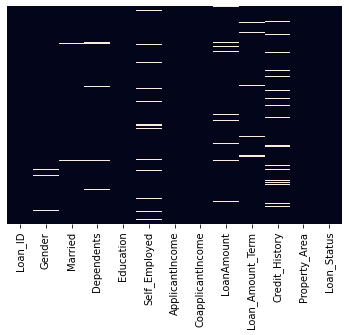

In [9]:
# missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

data.isnull().sum()/len(data)*100

- there are some missing values in the columns of GENDER, MARRIED, DEPENDENTS, SELF EMPLOYED, LOAN AMOUNT, LOAN AMOUNT TERM and CREDIT HISTORY.

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- 5 features are in numerical values.

## EDA

In [11]:
sns.set_theme(style="whitegrid")

Text(0.5, 1.0, 'Histogram of Applicant Income')

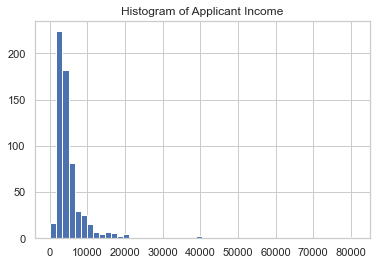

In [12]:
data['ApplicantIncome'].hist(bins=50)

plt.title('Histogram of Applicant Income')

<AxesSubplot:>

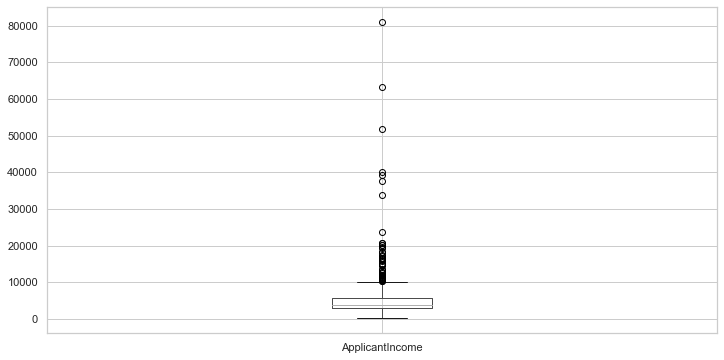

In [13]:
plt.figure(figsize=(12,6))
data.boxplot(column='ApplicantIncome')

- there are a couple outliers likely due to income disparity in the society, this needs a deeper understanding.

Text(0.5, 1.0, 'Histogram of Coapplicant Income')

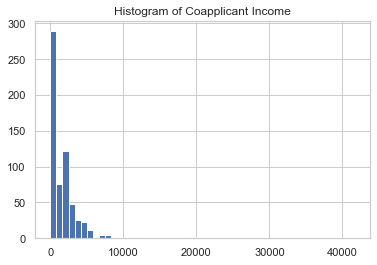

In [14]:
data['CoapplicantIncome'].hist(bins=50)

plt.title('Histogram of Coapplicant Income')

<AxesSubplot:xlabel='CoapplicantIncome'>

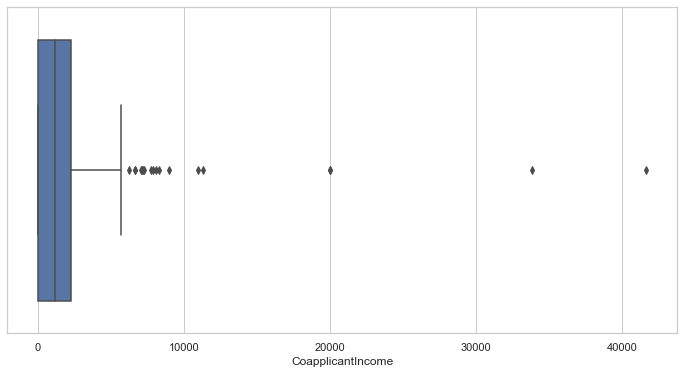

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='CoapplicantIncome', data=data)

- the coapplicant income is much less (about 2 times) compared to the applicant income, however there are also a few outliers.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

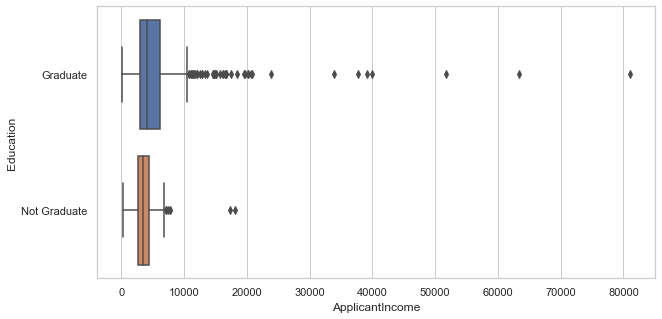

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='ApplicantIncome', y='Education', data=data)

- those who have a graduate degree earns more income.
- however, the mean income between graduate and non-graduate are almost similar.
- there are a few high incomes from gradutes as represented by the outliers.

<AxesSubplot:>

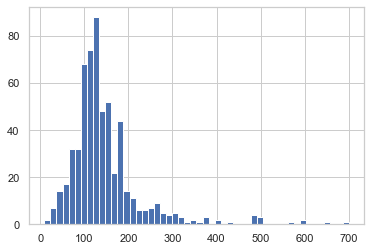

In [17]:
data['LoanAmount'].hist(bins=50)

<AxesSubplot:xlabel='LoanAmount'>

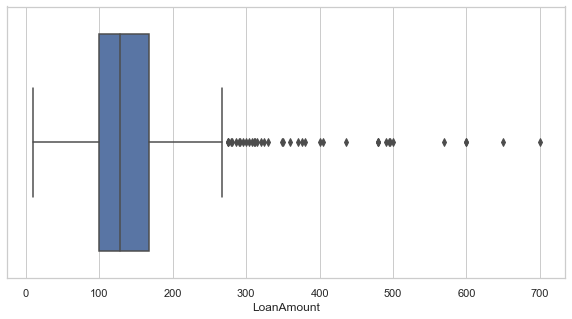

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanAmount', data=data)

- there are a few extreme values too in the LOAN AMOUNT column, which also needs a deeper understanding.
- some data cleaning is needed due to missing values present.

<AxesSubplot:xlabel='LoanAmount', ylabel='Education'>

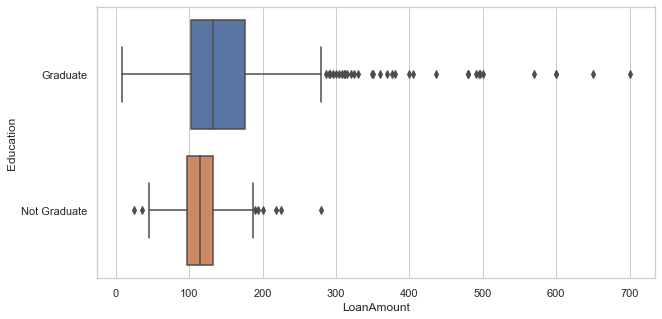

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='LoanAmount', y='Education', data=data)

- graduates tend to loan more compared to non-graduates.
- however their mean loan amount is slightly similar.
- graduates have a few outliers.

In [20]:
data['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

Text(0.5, 1.0, 'Applicants by CREDIT HISTORY')

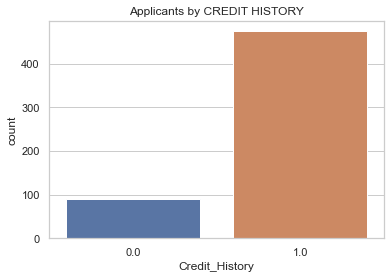

In [21]:
sns.countplot(x='Credit_History', data=data)
plt.title('Applicants by CREDIT HISTORY')

Text(0.5, 1.0, 'Applicants CREDIT HISTORY with LOAN STATUS')

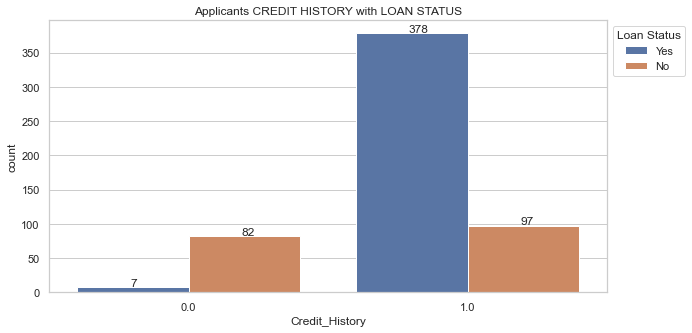

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Credit_History', data=data, hue='Loan_Status')

for p in ax.patches:
        b = p.get_bbox()
        value = p.get_height()
        ax.annotate(str(value), (b.x1-0.21, b.y1+2))


plt.legend(['Yes','No'],title='Loan Status',
           bbox_to_anchor=(1,1), loc=2)

plt.title('Applicants CREDIT HISTORY with LOAN STATUS')

In [23]:
# probability of LOAN STATUS a yes based on CREDIT HISTORY
data.groupby('Credit_History')['Loan_Status'].describe()[['count','freq']]

,count,freq
Credit_History,,
0.0,89,82
1.0,475,378


- Applicants who have a good credit history have a higher chance of success in getting a loan.

Text(0.5, 1.0, 'Applicants LOAN STATUS by GENDER')

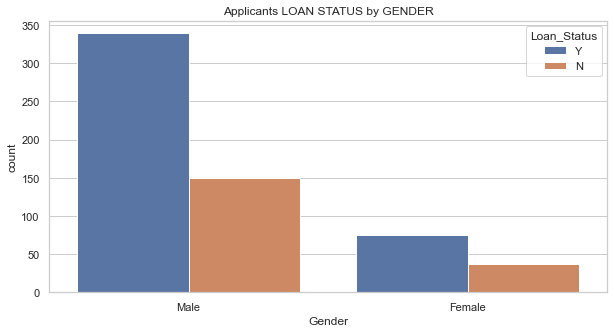

In [24]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Gender', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by GENDER')

- Most of the applicants are male.

Text(0.5, 1.0, 'Applicants CREDIT HISTORY AND GENDER by LOAN STATUS')

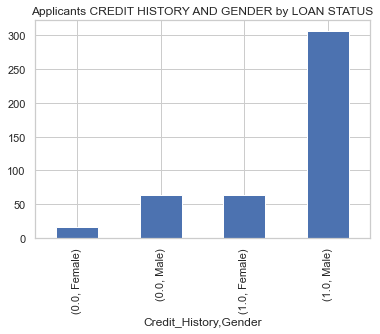

In [25]:
data.groupby(['Credit_History','Gender'])['Loan_Status'].describe()['freq'].plot(kind='bar')
plt.title('Applicants CREDIT HISTORY AND GENDER by LOAN STATUS')

Text(0.5, 1.0, 'Applicants LOAN STATUS by MARRIED status')

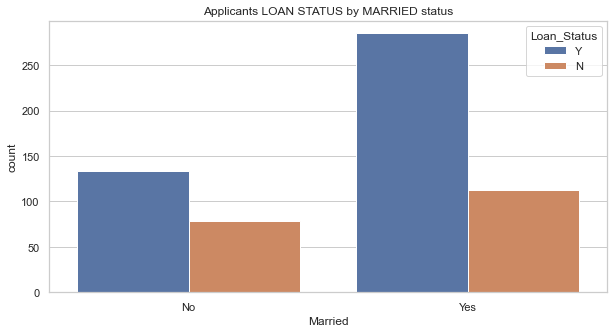

In [26]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Married', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by MARRIED status')

- Most of the applicants are married.

Text(0.5, 1.0, 'Applicants CREDIT HISTORY, GENDER and MARRIED status by LOAN STATUS')

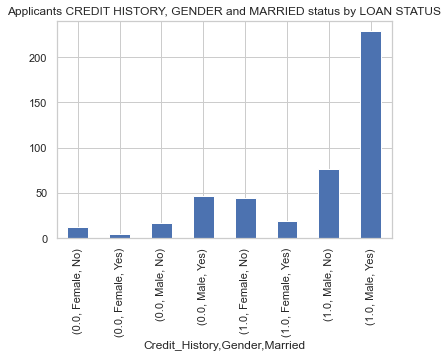

In [27]:
data.groupby(['Credit_History','Gender','Married'])['Loan_Status'].describe()['freq'].plot(kind='bar')
plt.title('Applicants CREDIT HISTORY, GENDER and MARRIED status by LOAN STATUS')

- Applicants who are male and have a good credit history regardless of their married status tends to have a higher chance of getting a loan.

Text(0.5, 1.0, 'Applicants LOAN STATUS by SELF EMPLOYED status')

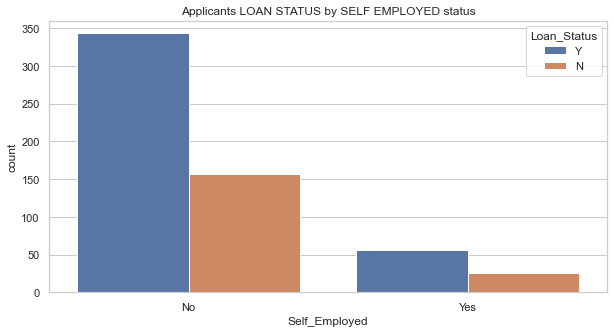

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='Self_Employed', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by SELF EMPLOYED status')

- Applicants who are not self employed have a higher chance of getting a loan

Text(0.5, 1.0, 'Applicants LOAN STATUS by PROPERTY AREA')

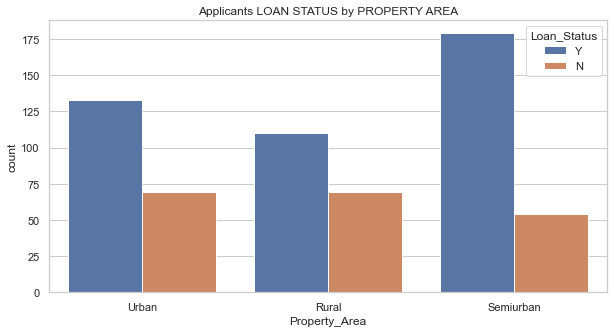

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Property_Area', data=data, hue='Loan_Status')

plt.title('Applicants LOAN STATUS by PROPERTY AREA')

- Applicants who lived in semiurban areas are better at getting a loan. 
- However, there's not much of a difference between urban and rural applicants.
- This might mean that the loan is approved does not take into account where the applicant's lived.

<AxesSubplot:>

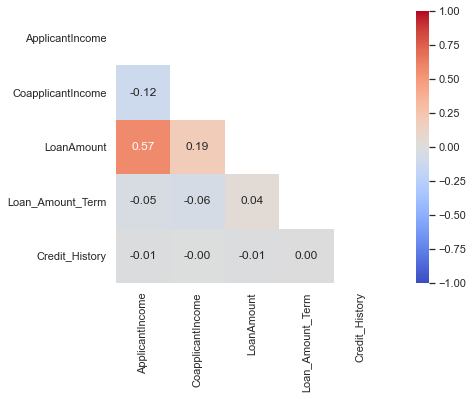

In [30]:
# Create a mask
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), mask=mask, annot=True,
            fmt='.2f', square=True, cmap='coolwarm', 
            vmin=-1, vmax=1)

## Data Cleaning

In [31]:
data.isnull().sum()/len(data)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

- the columns that have missing values only have less than 10% missing.
- we can try to remove these values, but we have to look through them to decide.

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

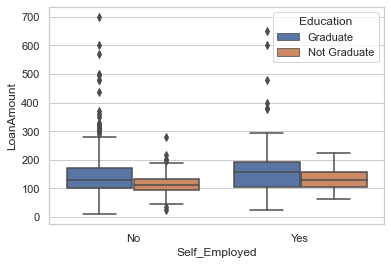

In [32]:
sns.boxplot(y='LoanAmount', x='Self_Employed', data=data, hue='Education')

- the mean LOAN AMOUNT varies based on the applicants EDUCATION level and SELF EMPLOYED status.
- due to there is some missing values in SELF EMPLOYED column, we need to fill it with something reasonable before imputing the mean into the missing LOAN AMOUNT column.

In [33]:
data['Self_Employed'].value_counts()/len(data)*100

No     81.433225
Yes    13.355049
Name: Self_Employed, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

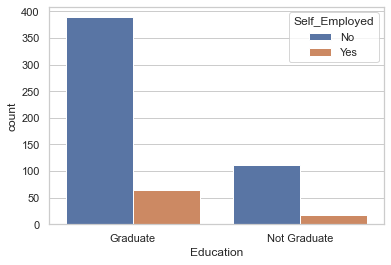

In [34]:
sns.countplot(x='Education',data=data,hue='Self_Employed')

- since about 81% are no in the SELF EMPLOYED column, it is a reasonable assumption to conclude that the others are no too.

#### Fill Missing Values for SELF EMPLOYED

In [35]:
data['Self_Employed'].fillna('No',inplace=True)

#### Impute Missing Values for LOAN AMOUNT

In [36]:
data.groupby(['Education','Self_Employed'])['LoanAmount'].median()

Education     Self_Employed
Graduate      No               130.0
              Yes              157.5
Not Graduate  No               113.0
              Yes              130.0
Name: LoanAmount, dtype: float64

- due to large amounts of outliers in LOAN AMOUNT, the median is chosen to replace the missing values.

In [37]:
def fill_loan(cols):
    edu = cols[0]
    self = cols[1]
    
    if edu == 'Graduate':
        if self == 'No':
            return 130.0
        else:
            return 157.5
        
    elif edu == 'Not Graduate':
        if self == 'No':
            return 113.0
        else:
            return 130.0


In [38]:
data['LoanAmount'].fillna(data[['Education','Self_Employed']].apply(fill_loan, axis=1), inplace=True)

#### Other Categorical Missing Values

<AxesSubplot:xlabel='Gender', ylabel='count'>

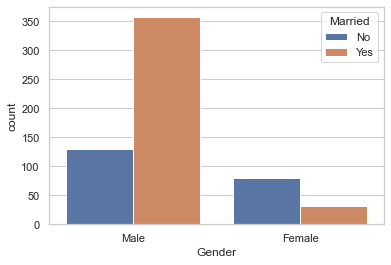

In [39]:
sns.countplot(x='Gender', data=data, hue='Married')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

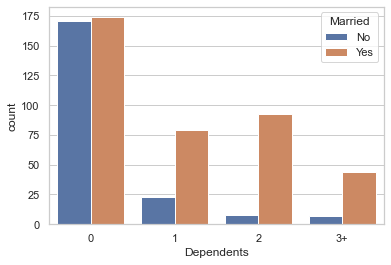

In [40]:
sns.countplot(x='Dependents', data=data, hue='Married')

<AxesSubplot:xlabel='Gender,Dependents'>

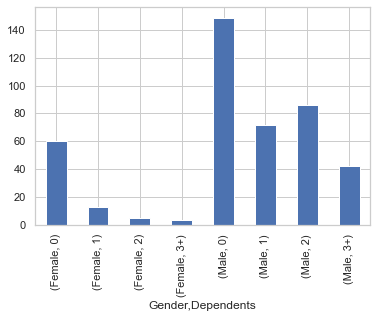

In [41]:
data.groupby(['Gender','Dependents'])['Married'].describe()['freq'].plot(kind='bar')

- since there is a large number of applicants who are male, married and have zero dependence, we shall take this assumption for the missing values.

In [42]:
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('Yes', inplace=True)
data['Dependents'].fillna('0', inplace=True)

#### Other Numerical Missing Values

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

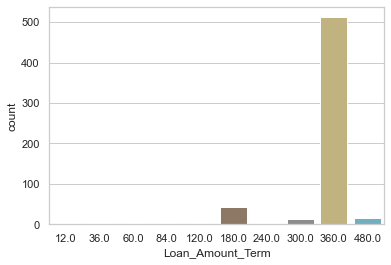

In [43]:
sns.countplot(x='Loan_Amount_Term', data=data)

- since the most LOAN AMOUNT TERM are 360 months, we shall take this as the assumption for the missing values.

In [44]:
data.groupby('Credit_History')[['Education','Self_Employed']].describe()

Education                       Self_Employed                
                   count unique       top freq         count unique top freq
Credit_History                                                              
0.0                   89      2  Graduate   63            89      2  No   77
1.0                  475      2  Graduate  380           475      2  No  412

- applicants who have an EDUCATION and not SELF EMPLOYED tends to have a good CREDIT HISTORY.
- by using this assumption, the missing values in CREDIT HISTORY will be replace with a 1.

In [45]:
data['Loan_Amount_Term'].fillna(360.0, inplace=True)
data['Credit_History'].fillna(1.0, inplace=True)

In [46]:
data.isnull().sum()/len(data)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

- most of the assumptions made are purely based on the hard assumption according to their higher frequency occurence, other methods which look into the probability may be made.

#### Outliers

- besides removing outliers, it's better to use log transform to nullify the effects.

In [47]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])

Text(0.5, 1.0, 'LOG-LOAN AMOUNT')

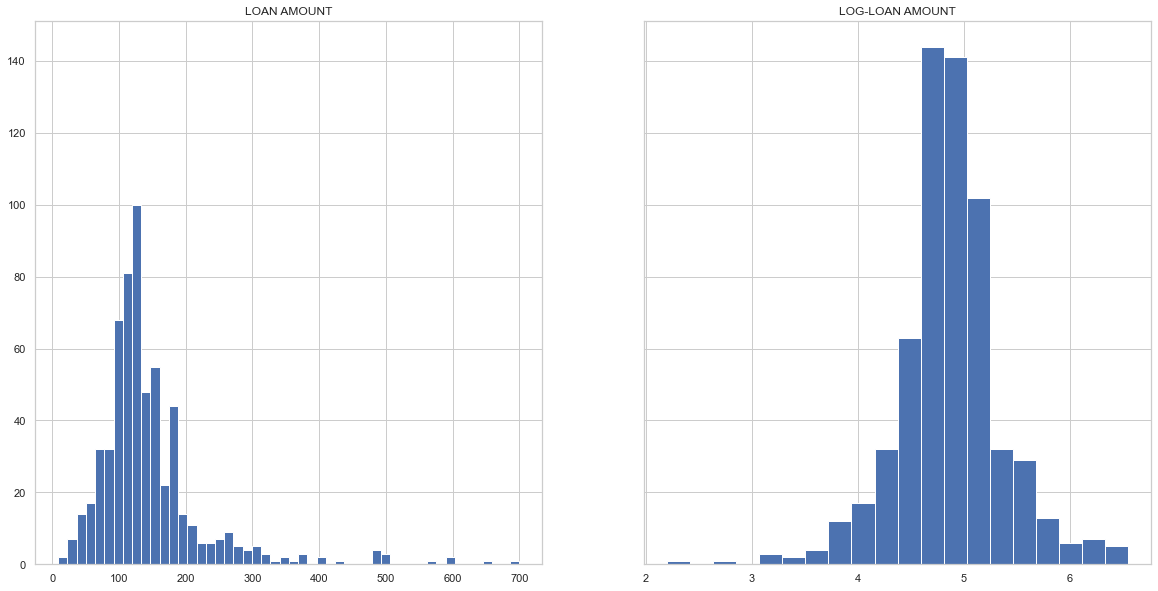

In [48]:
fig, axes = plt.subplots(1,2, figsize=(20,10), sharey=True)

plt.subplot(1,2,1)
data['LoanAmount'].hist(bins=50)
plt.title('LOAN AMOUNT')

plt.subplot(1,2,2)
data['LoanAmount_log'].hist(bins=20)
plt.title('LOG-LOAN AMOUNT')

- the effects of the outliers have been reduced while using log transform.

In [49]:
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

data['Total_income_log'] = np.log(data['Total_income'])

Text(0.5, 1.0, 'Historgram of Log-TOTAL INCOME')

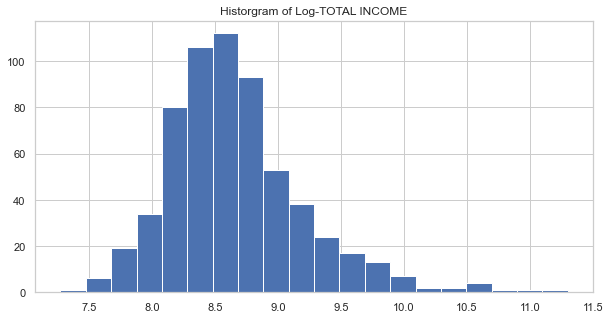

In [50]:
plt.figure(figsize=(10,5))

data['Total_income_log'].hist(bins=20)
plt.title('Historgram of Log-TOTAL INCOME')

- there might be some applicants with a lower income but a co-applicant with a higher income that might determine the success rate of the loan.

## Data Pre-processing

#### Encode Categorical Values

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
label = ['Dependents','Loan_Status']

one = ['Gender','Married','Education','Self_Employed','Property_Area']

In [53]:
le = LabelEncoder()

for n in label:
    data[n] = le.fit_transform(data[n])
    
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,1,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


In [54]:
data_encode = pd.get_dummies(data, columns=one, drop_first=True)

data_encode.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Total_income,Total_income_log,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.0,130.0,360.0,1.0,1,4.867534,5849.0,8.674026,1,0,0,0,0,1
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,0,4.852030,6091.0,8.714568,1,1,0,0,0,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,1,4.189655,3000.0,8.006368,1,1,0,1,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,1,4.787492,4941.0,8.505323,1,1,1,0,0,1
4,LP001008,0,6000,0.0,141.0,360.0,1.0,1,4.948760,6000.0,8.699515,1,0,0,0,0,1


#### Split data to training and testing

In [55]:
X = data_encode.drop(['Loan_Status','ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income','Loan_ID'], axis=1)

y = data_encode['Loan_Status']

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

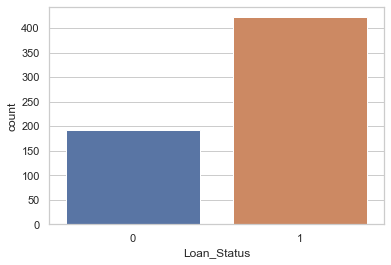

In [56]:
sns.countplot(x='Loan_Status', data=data)

- due to imbalance of data, when splitting the data for testing, enable stratify.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=101)

## Model Selection

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [59]:
models = []

models.append(('LogReg', LogisticRegression(random_state=101)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DTC', DecisionTreeClassifier(random_state=101)))
models.append(('RFC', RandomForestClassifier(random_state=101)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('NB', GaussianNB()))
models.append(('SVM',SVC()))

In [60]:
# StratifiedKFold use for classification, KFold use for regression
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [61]:
# using k-fold of 10 for cross validation
results = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')

LogReg: 0.80437430786268 (0.03721165057453351)
LDA: 0.80437430786268 (0.03721165057453351)
DTC: 0.7136766334440754 (0.07726205114061238)
RFC: 0.7810077519379844 (0.0507515182390586)
KNN: 0.6784053156146179 (0.05436336789124987)
NB: 0.795016611295681 (0.03355481727574751)
SVM: 0.6876522702104098 (0.011003233317459312)


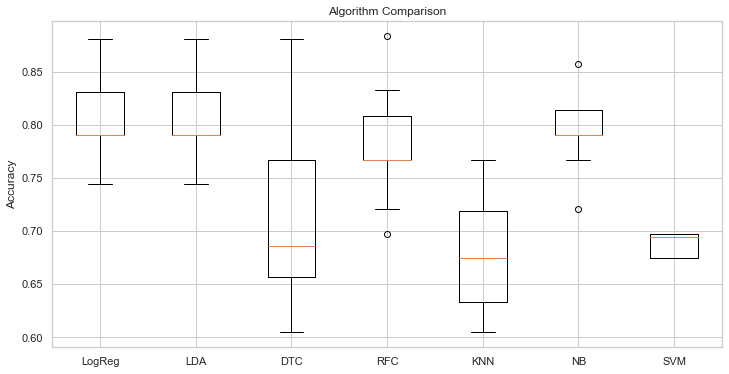

In [62]:
plt.figure(figsize=(12,6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.show()

- LogReg and LDA both perform the best, NB can be chosen as a secondary option for testing. RFC can also be chosen, eventhoug it has a large variance but by tuning it's parameters a better model might be found.

In [63]:
results_pred = []
names = []

for name, model in models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[ 54  80]
 [  4 291]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       134
           1       0.78      0.99      0.87       295

    accuracy                           0.80       429
   macro avg       0.86      0.69      0.72       429
weighted avg       0.83      0.80      0.78       429

LDA:
[[ 54  80]
 [  4 291]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       134
           1       0.78      0.99      0.87       295

    accuracy                           0.80       429
   macro avg       0.86      0.69      0.72       429
weighted avg       0.83      0.80      0.78       429

DTC:
[[ 72  62]
 [ 61 234]]
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       134
           1       0.79      0.79      0.79       295

    accuracy                           0.71       429
   macro avg       0.67      0.67      0.

- LogReg, LDA and NB have an overall better score with RFC can also be considered by tuning it's parameters.
- all of the models have a hard time classifiying the rejected status.

## Parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

### RFC

In [65]:
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.1, 1, 10], 
              'min_samples_leaf': [0.1, 1, 10], 
              'max_features': [n for n in range(1,6)]}

skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [0.1, 1, 10],
                         'min_samples_split': [0.1, 1, 10],
                         'n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [66]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 0.1,
 'n_estimators': 1}

In [67]:
grid_search.best_score_

0.7361936731708484

In [68]:
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.001, 0.01, 0.1], 
              'min_samples_leaf': [10, 50, 100], 
              'max_features': [n for n in range(1,6)]}

skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [0.001, 0.01, 0.1],
                         'n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [69]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 0.1,
 'n_estimators': 1}

In [70]:
grid_search.best_score_

0.7361936731708484

In [71]:
rfc = grid_search

### LogReg

In [72]:
param_grid = {'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 
              'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
              'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=LogisticRegression(random_state=101),
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [73]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}

In [74]:
grid_search.best_score_

0.7127013732755224

In [75]:
param_grid = {'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'], 
              'penalty': ['none', 'l1', 'l2', 'elasticnet'], 
              'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=LogisticRegression(random_state=101),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [76]:
grid_search.best_params_

{'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}

In [77]:
grid_search.best_score_

0.7127013732755224

In [78]:
logreg = grid_search

### LDA

In [79]:
param_grid = {'solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen']}, refit='f1_macro',
             return_train_score=True, scoring=['accuracy', 'f1_macro'])

In [80]:
grid_search.best_params_

{'solver': 'svd'}

In [81]:
grid_search.best_score_

0.7127013732755224

In [82]:
lda = grid_search

## Evaluation
### Confusion Matrix & Classification Report

In [83]:
chosen_models = []

chosen_models.append(('LogReg', LogisticRegression(C=0.01, penalty='none', solver='newton-cg', 
                                                   random_state=101)))
chosen_models.append(('LDA', LinearDiscriminantAnalysis(solver='svd')))
chosen_models.append(('RFC', RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                                                    min_samples_split=0.1, n_estimators=1,
                                                    random_state=101)))
chosen_models.append(('NB', GaussianNB()))

In [84]:
results_pred = []
names = []

for name, model in chosen_models:
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    pred_results = cross_val_predict(model, X_train, y_train, cv=skfold)

    results_pred.append(pred_results)
    names.append(name)
    
    print(f'{name}:')
    print(confusion_matrix(y_train, pred_results))
    print(classification_report(y_train, pred_results))

LogReg:
[[ 54  80]
 [  4 291]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       134
           1       0.78      0.99      0.87       295

    accuracy                           0.80       429
   macro avg       0.86      0.69      0.72       429
weighted avg       0.83      0.80      0.78       429

LDA:
[[ 54  80]
 [  4 291]]
              precision    recall  f1-score   support

           0       0.93      0.40      0.56       134
           1       0.78      0.99      0.87       295

    accuracy                           0.80       429
   macro avg       0.86      0.69      0.72       429
weighted avg       0.83      0.80      0.78       429

RFC:
[[ 66  68]
 [ 15 280]]
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       134
           1       0.80      0.95      0.87       295

    accuracy                           0.81       429
   macro avg       0.81      0.72      0.

### ROC Curve

In [85]:
# logreg & lda
log_df_scores = cross_val_predict(chosen_models[0][1], X_train, y_train, cv=skfold,
                                  method='decision_function')


lda_df_scores = cross_val_predict(chosen_models[1][1], X_train, y_train, cv=skfold,
                                  method='decision_function')

In [86]:
# rfc & nb
rfc_proba_scores = cross_val_predict(chosen_models[2][1], X_train, y_train, cv=skfold,
                                     method='predict_proba')

rfc_proba_scores = rfc_proba_scores[:, 1]                                                # score = proba of positive class


nb_proba_scores = cross_val_predict(chosen_models[3][1], X_train, y_train, cv=skfold,
                                    method='predict_proba')

nb_proba_scores = nb_proba_scores[:, 1]

In [87]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)') 
    plt.ylabel('True Positive Rate (Recall)')    
    plt.grid(True)                                            

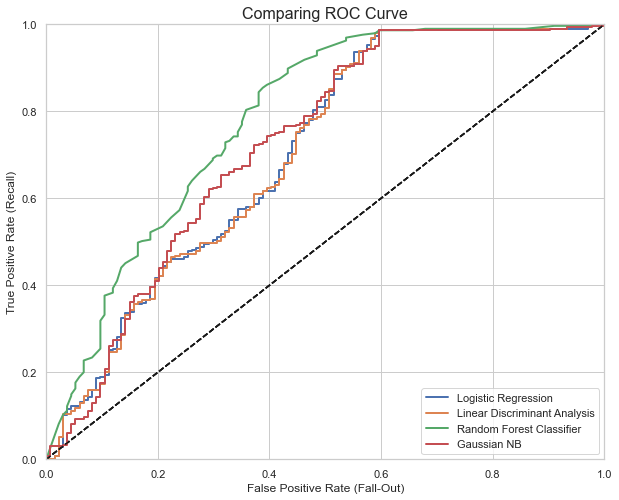

In [88]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_train, log_df_scores)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_train, lda_df_scores)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train, rfc_proba_scores)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_train, nb_proba_scores)

# plot 
plt.figure(figsize=(10,8))

# model
plot_roc_curve(fpr_log, tpr_log, 'Logistic Regression')
plot_roc_curve(fpr_lda, tpr_lda, 'Linear Discriminant Analysis')
plot_roc_curve(fpr_rfc, tpr_rfc, 'Random Forest Classifier')
plot_roc_curve(fpr_nb, tpr_nb, 'Gaussian NB')

# misc
plt.title('Comparing ROC Curve', fontsize=16)
plt.legend(loc='lower right')

- based on the results from the confusion matrix, classification report and ROC curve, RFC is the better choice.

## Model 2

<AxesSubplot:>

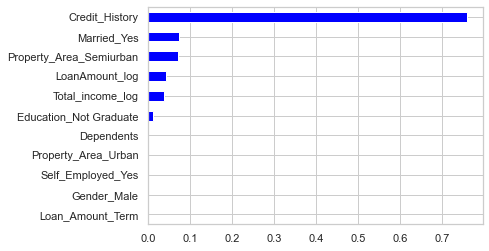

In [89]:
feaimp = pd.Series(rfc.best_estimator_.feature_importances_, index=X.keys()).sort_values(ascending=True)

feaimp.plot(kind='barh', 
            color='blue')

- let's only include the top 5 features to see if there is any improvements.

In [136]:
X_train_feaimp = X_train[feaimp.tail().index]
X_test_feaimp = X_test[feaimp.tail().index]

In [98]:
param_grid = {'n_estimators': [1, 10, 100], 
              'max_depth': [1, 10, 100], 
              'min_samples_split': [0.001, 0.01, 0.1], 
              'min_samples_leaf': [10, 50, 100], 
              'max_features': [n for n in range(1,6)]}

skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

grid_search = GridSearchCV(RandomForestClassifier(random_state=101), param_grid=param_grid, cv=skfold, 
                           scoring=['accuracy', 'f1_macro'], refit='f1_macro',
                           return_train_score=True)

grid_search.fit(X_train_feaimp, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(random_state=101),
             param_grid={'max_depth': [1, 10, 100],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [0.001, 0.01, 0.1],
                         'n_estimators': [1, 10, 100]},
             refit='f1_macro', return_train_score=True,
             scoring=['accuracy', 'f1_macro'])

In [99]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 0.1,
 'n_estimators': 10}

In [100]:
grid_search.best_score_

0.7154139963388586

In [113]:
grid_search.best_index_

223

In [104]:
rfc_feaimp = grid_search

In [112]:
rfc_feaimp_results = pd.DataFrame(rfc_feaimp.cv_results_)

rfc_feaimp_f1 = rfc_feaimp_results[rfc_feaimp_results['mean_test_f1_macro']==rfc_feaimp.best_score_]

metrics_mean = ['params','mean_train_accuracy','mean_test_accuracy','mean_train_f1_macro','mean_test_f1_macro']

display(rfc_feaimp_f1[metrics_mean].T)

,223,358
params,"{'max_depth': 10, 'max_features': 4, 'min_samp...","{'max_depth': 100, 'max_features': 4, 'min_sam..."
mean_train_accuracy,0.806011,0.806011
mean_test_accuracy,0.804374,0.804374
mean_train_f1_macro,0.724206,0.724206
mean_test_f1_macro,0.715414,0.715414


In [115]:
rfc_feaimp.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=0.1, n_estimators=10,
                       random_state=101)

In [116]:
rfc.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=10,
                       min_samples_split=0.1, n_estimators=1, random_state=101)

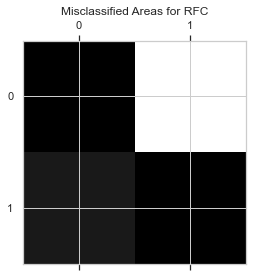

RFC:
[[ 66  68]
 [ 15 280]]
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       134
           1       0.80      0.95      0.87       295

    accuracy                           0.81       429
   macro avg       0.81      0.72      0.74       429
weighted avg       0.81      0.81      0.79       429



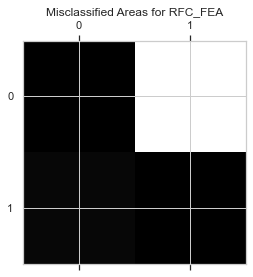

RFC_FEA:
[[ 55  79]
 [  5 290]]
              precision    recall  f1-score   support

           0       0.92      0.41      0.57       134
           1       0.79      0.98      0.87       295

    accuracy                           0.80       429
   macro avg       0.85      0.70      0.72       429
weighted avg       0.83      0.80      0.78       429



In [125]:
results_pred = []
names = ['RFC','RFC_FEA']

for n in range(2):
    skfold = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
    
    if n == 0:
        pred_results = cross_val_predict(rfc.best_estimator_, X_train, y_train, cv=skfold)
        results_pred.append(pred_results)
        
    else:
        pred_results = cross_val_predict(rfc_feaimp.best_estimator_, X_train_feaimp, y_train, cv=skfold)
        results_pred.append(pred_results)
    
    # plot misclassified areas
    con_mat = confusion_matrix(y_train, pred_results)
    
    row_sums = con_mat.sum(axis=1, keepdims=True)
    norm_con_mat = con_mat / row_sums

    np.fill_diagonal(norm_con_mat, 0)
    plt.matshow(norm_con_mat, cmap=plt.cm.gray)

    plt.title(f'Misclassified Areas for {names[n]}')
    plt.show()
    
    print(f'{names[n]}:')
    print(con_mat)
    print(classification_report(y_train, pred_results))

- the 1st RFC model performs better.
- however with features selected, the 2nd model is able to classified success better but performs poorly on classifiying rejected.
- both have a difficult time classifiying rejects.

In [122]:
rfc_feaimp_proba_scores = cross_val_predict(rfc_feaimp.best_estimator_, X_train_feaimp, y_train, cv=skfold,
                                            method='predict_proba')

rfc_feaimp_proba_scores = rfc_feaimp_proba_scores[:, 1] 

fpr_rfc_feaimp, tpr_rfc_feaimp, thresholds_rfc_feaimp = roc_curve(y_train, rfc_feaimp_proba_scores)

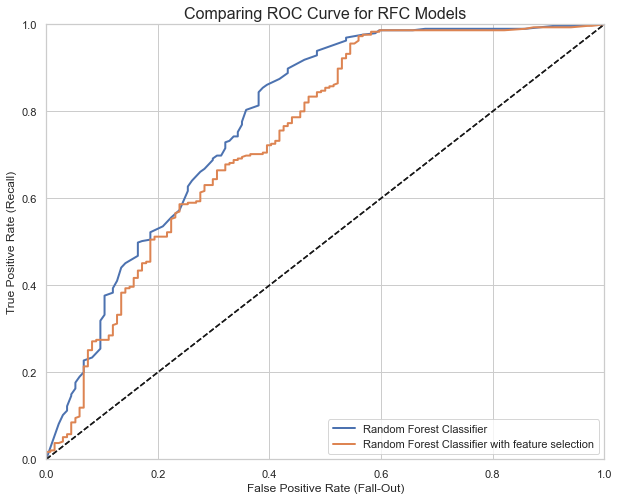

In [123]:
# plot 
plt.figure(figsize=(10,8))

# model
plot_roc_curve(fpr_rfc, tpr_rfc, 'Random Forest Classifier')
plot_roc_curve(fpr_rfc_feaimp, tpr_rfc_feaimp, 'Random Forest Classifier with feature selection')

# misc
plt.title('Comparing ROC Curve for RFC Models', fontsize=16)
plt.legend(loc='lower right')

- based on the ROC curve, the 1st RFC model still performs better.

## Final Model

In [138]:
rfc_model = rfc.best_estimator_

rfc_model.fit(X_train, y_train)

pred = rfc_model.predict(X_test)

print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')

[[ 28  30]
 [  3 124]]
              precision    recall  f1-score   support

           0       0.90      0.48      0.63        58
           1       0.81      0.98      0.88       127

    accuracy                           0.82       185
   macro avg       0.85      0.73      0.76       185
weighted avg       0.84      0.82      0.80       185

